# Proyek Analisis Data: Dongsi Air Pollution 
- **Nama:** Benedictus Ryu Gunawan
- **Email:** benedictusryugunawan@gmail.com
- **ID Dicoding:** Benedictus Ryu Gunawan

## Menentukan Pertanyaan Bisnis

- Bagaimana trend PM2.5 dan PM10 dari tanggal 01/03/2013 sampai 28/02/2017 di stasiun Dongsi?
- Bagaimana monthly average untuk zat pencemar (SO2, NO2, CO, O3) di stasiun Dongsi?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
dongsi_df = pd.read_csv('Data/PRSA_Data_Dongsi_20130301-20170228.csv')

**Insight:**
- Memuat csv data ke dalam dataframe

### Assessing Data

In [7]:
dongsi_df.head()
dongsi_df.info()
dongsi_df.isna().sum() 
print(f"Jumlah Duplikat: {dongsi_df.duplicated().sum()}")
dongsi_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah Duplikat: 0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


**Insight:**
- List Data Hilang [PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM]
    - PM2.5 = 750
    - PM10 = 553
    - SO2 = 663
    - NO2 = 1601
    - CO = 3197
    - O3 = 664
    - TEMP = 20
    - PRES = 20
    - DEWP = 20
    - RAIN = 20
    - wd = 78
    - WSPM = 14
- Tidak ada Duplikat
- Tidak ada innaccurate value

### Cleaning Data

In [9]:
missing_value = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "wd", "WSPM"]
for val in missing_value:
    mode_value = dongsi_df[val].mode()[0]
    dongsi_df[val] = dongsi_df[val].fillna(mode_value)
    
dongsi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- Menggunakan teknik imputation untuk mengganti data yang hilang dengan nilai modus
- alasan penggunaan nilai modus adalah agar data tidak menimbulkan ketimpangan pada data

## Exploratory Data Analysis (EDA)

### Explore 

In [11]:
dongsi_df.describe() 
dongsi_df.groupby(by="year").agg({
    "PM2.5": ["max", "min", "mean"],
    "PM10": ["max", "min", "mean"]
})
dongsi_df.groupby(by="year").agg({
    "SO2": ["max", "min", "mean"],
    "NO2": ["max", "min", "mean"],
    "CO": ["max", "min", "mean"],
    "O3": ["max", "min", "mean"],
})
dongsi_df.groupby(by="month").agg({
    "SO2": ["max", "min", "mean"],
    "NO2": ["max", "min", "mean"],
    "CO": ["max", "min", "mean"],
    "O3": ["max", "min", "mean"],
})


SO2                          NO2                       CO         \
            max     min       mean       max  min       mean      max    min   
month                                                                          
1      300.0000  1.0000  33.252117  192.0000  2.0  56.053394   9500.0  100.0   
2      278.0000  2.0000  30.244469  164.0000  2.0  39.634956   6600.0  100.0   
3      198.0000  2.0000  30.252256  258.0000  6.0  61.217417   6800.0  100.0   
4      111.0000  2.0000  16.414912  182.0000  2.0  46.848007   3800.0  100.0   
5      157.0000  2.0000  17.421976  183.0000  2.0  44.317473   4700.0  100.0   
6       89.0000  0.2856  10.585463  160.0000  6.0  44.156254  10000.0  100.0   
7      109.0992  0.2856   6.823145  139.1934  4.0  40.343300   3600.0  200.0   
8       55.0000  0.2856   5.807727  140.0000  2.0  40.767553   6700.0  200.0   
9      104.0000  1.0000   8.057597  166.0000  3.0  53.267084   4600.0  100.0   
10     178.0000  1.0000  12.151641  256.0000  3.0  67.889923   6400.0  100.0   
11     196.0000  2.0000  19.264549  198.0000  2.0  63.972083   9600.0  100.0   
12     164.0000  2.0000  28.814907  210.0000  2.0  66.337478  10000.0  100.0   

                        O3                     
              mean     max     min       mean  
month                                          
1      1800.033602   500.0  1.0000  27.386828  
2      1387.684366   111.0  2.0000  40.748525  
3      1356.312836   188.0  0.6426  50.729746  
4       900.915972   257.0  2.0000  71.188637  
5       912.544691   306.0  2.0000  90.985400  
6       917.173264   335.0  2.0000  91.627771  
7       813.911290   306.0  1.0710  87.281648  
8       891.229839  1071.0  1.0000  90.615993  
9      1065.727778   237.0  1.0000  54.886687  
10     1259.711022   247.0  1.0000  29.054367  
11     1573.020833   111.0  2.0000  18.638930  
12     1953.259409    76.0  2.0000  19.846178

**Insight:**
- Secara rata-rata PM2.5 cenderung stabil, namun mengalami penurunan signifikan pada tahun 2016 dan kenaikan yang cukup ekstrim pada tahun 2017.
- Berbeda dengan PM2.5, PM10 cenderung bersifat fluktuatif.
- Nilai maksimum untuk PM10 meningkat setiap tahunnya
- Nilai zat pencemar cenderung fluktuatif kecuali NO2 untuk rata-rata tahunan
- Pada setiap bulan terjadi banyak perubahan nilai rata-rata dari masing-masing zat pencemar

## Visualization & Explanatory Analysis

### Pertanyaan 1:

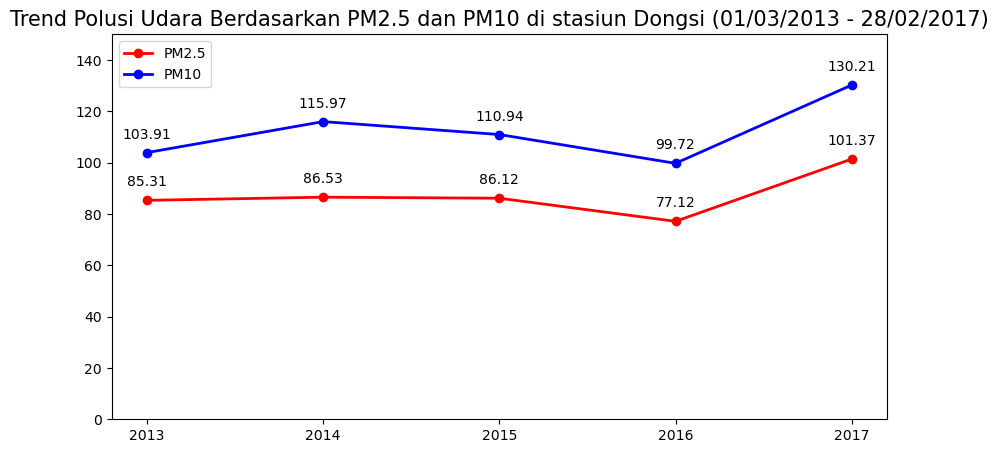

In [17]:
dongsi_year_PM25_df = dongsi_df.groupby(by="year").agg({
    "PM2.5": "mean",
})
dongsi_year_PM10_df = dongsi_df.groupby(by="year").agg({
    "PM10": "mean",
})

plt.figure(figsize=(10, 5))
plt.plot(dongsi_year_PM25_df, marker='o', linewidth=2, color="red")
plt.ylim([0, 150])

for i, row in dongsi_year_PM25_df.iterrows():
    plt.annotate(f'{round(row['PM2.5'],2)}', (i,row['PM2.5']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.plot(dongsi_year_PM10_df, marker='o', linewidth=2, color="blue")

for i, row in dongsi_year_PM10_df.iterrows():
    plt.annotate(f'{round(row['PM10'],2)}', (i,row['PM10']), textcoords="offset points", xytext=(0, 10), ha='center')

x_ticks = np.arange(dongsi_year_PM25_df.index.min(), dongsi_year_PM25_df.index.max() + 1, 1)
plt.xticks(ticks=x_ticks, labels=x_ticks)
plt.title("Trend Polusi Udara Berdasarkan PM2.5 dan PM10 di stasiun Dongsi (01/03/2013 - 28/02/2017)", loc="center", fontsize=15)
plt.legend(['PM2.5','PM10']) 
plt.show()

### Pertanyaan 2:

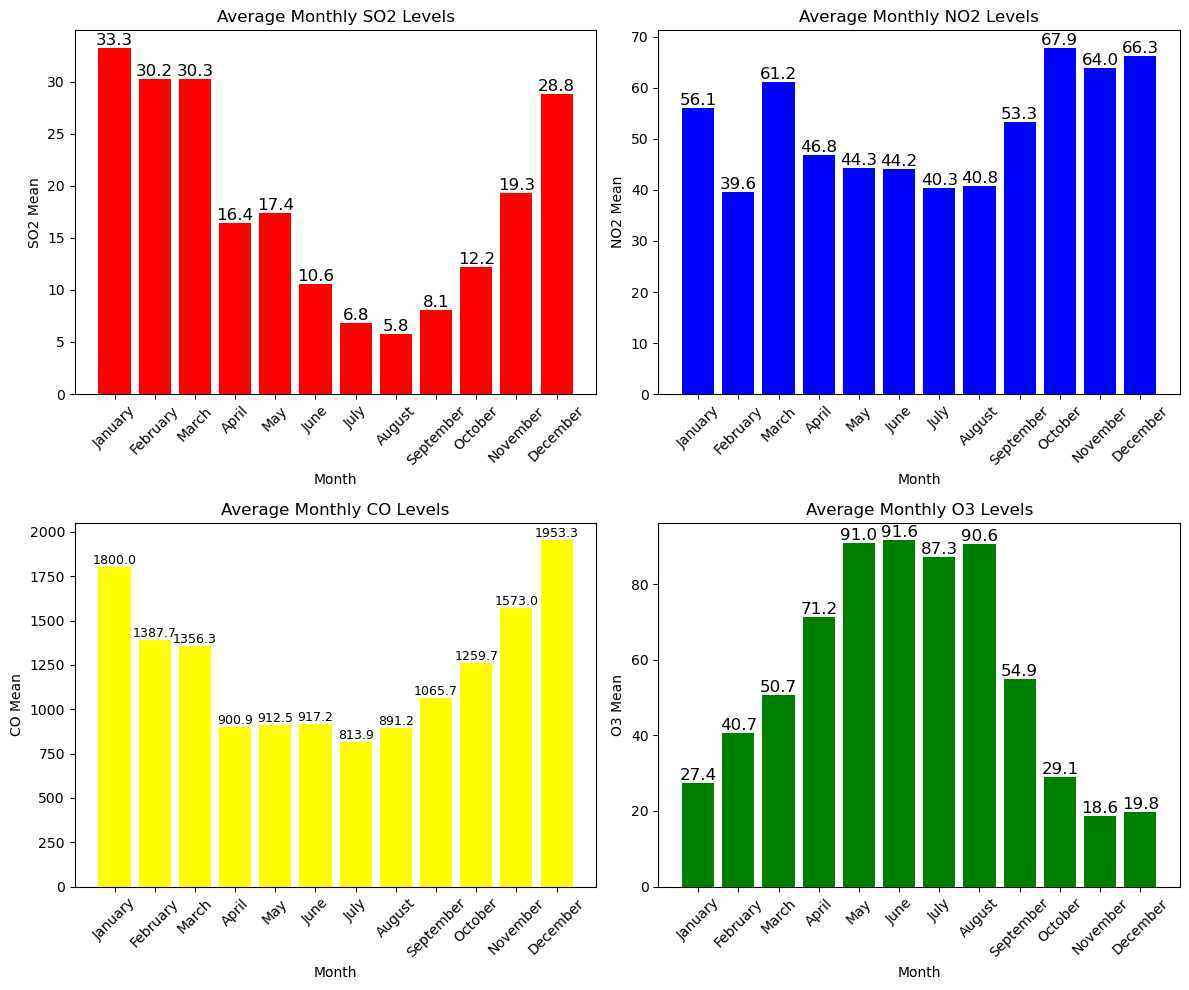

In [21]:
dongsi_SO2_df = dongsi_df.groupby(by="month").agg({"SO2": "mean"})
dongsi_NO2_df = dongsi_df.groupby(by="month").agg({"NO2": "mean"})
dongsi_CO_df = dongsi_df.groupby(by="month").agg({"CO": "mean"})
dongsi_O3_df = dongsi_df.groupby(by="month").agg({"O3": "mean"})
months = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
dongsi_SO2_df.index = dongsi_SO2_df.index.map(months)
dongsi_NO2_df.index = dongsi_NO2_df.index.map(months)
dongsi_CO_df.index = dongsi_CO_df.index.map(months)
dongsi_O3_df.index = dongsi_O3_df.index.map(months)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

so2_bar = axes[0, 0].bar(dongsi_SO2_df.index, dongsi_SO2_df["SO2"], color="red")
for bar in so2_bar:
    axes[0, 0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=12)

axes[0, 0].set_title("Average Monthly SO2 Levels")
axes[0, 0].set_ylabel("SO2 Mean")
axes[0, 0].set_xlabel("Month")
axes[0, 0].tick_params(axis='x', rotation=45) 

no2_bar = axes[0, 1].bar(dongsi_NO2_df.index, dongsi_NO2_df["NO2"], color="blue")
for bar in no2_bar:
    axes[0, 1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=12)

axes[0, 1].set_title("Average Monthly NO2 Levels")
axes[0, 1].set_ylabel("NO2 Mean")
axes[0, 1].set_xlabel("Month")
axes[0, 1].tick_params(axis='x', rotation=45) 

co_bar = axes[1, 0].bar(dongsi_CO_df.index, dongsi_CO_df["CO"], color="yellow")
for bar in co_bar:
    axes[1, 0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=9)

axes[1, 0].set_title("Average Monthly CO Levels")
axes[1, 0].set_ylabel("CO Mean")
axes[1, 0].set_xlabel("Month")
axes[1, 0].tick_params(axis='x', rotation=45) 

o3_bar = axes[1, 1].bar(dongsi_O3_df.index, dongsi_O3_df["O3"], color="green")
for bar in o3_bar:
    axes[1, 1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=12)

axes[1, 1].set_title("Average Monthly O3 Levels")
axes[1, 1].set_ylabel("O3 Mean")
axes[1, 1].set_xlabel("Month")
axes[1, 1].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()
dongsi_df.to_csv("dongsi_df.csv",index=False)

**Insight:**
- Untuk PM2.5 dan PM10 karena memiliki korelasi yang positif maka, nilainya saling naik apabila variabel lainnya naik vice versa
- Bulan mempengaruhi tingkat zat pencemar

## Conclusion

- Kesimpulan Pertanyaan 1:
  - Tingkat polusi udara PM2.5 dan PM10 cenderung stabil namun, mengalami kenaikan signifikan pada tahun 2017
  - Nilai PM2.5 dan PM10 memiliki korelasi positif
- Kesimpulan pertanyaan 2:
  - Bulan mempengaruhi tingkat zat pencemar
  - Grafik SO2 menunjukan gas SO2 mengalami penurunan hingga bulan agustus dan meningkat pada bulan September
  - Grafik NO2 cenderung fluktuatif pada 3 bulan awal, namun stabil pada 5 bulan kemudian dan meningkat pada bulan September dan Oktober
  - Grafik CO menunjukan terjadinya penurunan hingga april, lalu cenderung stabil hingga Agustus dan meningkat mulai September hingga Desember
  - Grafik O3 membentuk pola distribusi normal dimana, rata-rata meningkat hingga Mei dan cenderung stabil pada 3 bulan setelahnya dan mengalami penurunan ekstrim pada bulan September